In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
%cd drive/MyDrive/genrecog/
%pip install speechbrain
%pip install torchlibrosa

In [3]:
from genrecog.preprocess.preprocessor import Preprocessor
from genrecog.nnet.RNN import GRU
from genrecog.tools.trainer import RNNFbankTrainer
import torch
from torch.utils.data import TensorDataset, DataLoader 
import datetime

torch.manual_seed(0)

In [4]:
# Load dataset

train_preprcessor = Preprocessor('dataset/npz_files/train.npz')
test_preprcessor = Preprocessor('dataset/npz_files/test.npz')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
X, y = train_preprcessor.as_shuffled_torch()
X_test, y_test = test_preprcessor.as_shuffled_torch()

dataset = TensorDataset(X.to(device), y.to(device))
validation_dataset, train_dataset = torch.utils.data.random_split(dataset, (400, 3200))
test_dataset = TensorDataset(X_test.to(device), y_test.to(device))

train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=400)
validation_dataloader = DataLoader(validation_dataset, shuffle=True, batch_size=400)
test_dataloader = DataLoader(test_dataset, shuffle=True, batch_size=400)

In [6]:
hidden_size = 128
num_layers = 5
input_size = 40
output_dim = 10
time_sequence = 702
lr = 0.001
model = GRU(
    input_size=input_size, 
    time_sequence=time_sequence,
    hidden_size=hidden_size, 
    num_layers=num_layers, 
    output_dim=output_dim
    ).to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
model

GRU(
  (batch_norm_input): BatchNorm1d(702, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (glu): GRU(40, 128, num_layers=5, batch_first=True)
  (batch_norm_hidden): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear): Linear(in_features=128, out_features=10, bias=True)
)

In [7]:
trainer = RNNFbankTrainer(
    model=model, 
    optimizer=optimizer, 
    loss=loss, 
    train_dataloader=train_dataloader, 
    validation_dataloader=validation_dataloader, 
    num_epochs=100)
trainer.train()

============================== EPOCH 1 =================================
Training accuracy 30.87
Training loss 1.9278
Validation accuracy 20.00
Validation loss 2.2683
============================== EPOCH 2 =================================
Training accuracy 39.69
Training loss 1.7094
Validation accuracy 27.50
Validation loss 2.1161
============================== EPOCH 3 =================================
Training accuracy 42.50
Training loss 1.6352
Validation accuracy 37.50
Validation loss 1.9030
============================== EPOCH 4 =================================
Training accuracy 43.37
Training loss 1.5714
Validation accuracy 44.00
Validation loss 1.7215
============================== EPOCH 5 =================================
Training accuracy 46.09
Training loss 1.5073
Validation accuracy 47.50
Validation loss 1.6143
============================== EPOCH 6 =================================
Training accuracy 49.09
Training loss 1.4313
Validation accuracy 40.25
Validation loss 1.657

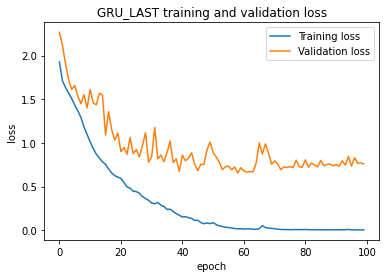

In [8]:
trainer.plot_loss("GRU_LAST training and validation loss")

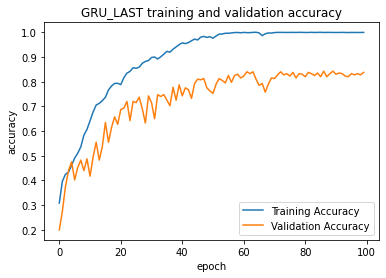

In [9]:
trainer.plot_accuracies("GRU_LAST training and validation accuracy")

In [10]:
trainer.eval(test_dataloader)

(tensor([6, 2, 3, 8, 7, 4, 1, 2, 5, 8, 4, 6, 6, 9, 4, 0, 8, 9, 7, 7, 2, 2, 2, 4,
         6, 5, 5, 6, 2, 9, 2, 3, 2, 1, 9, 1, 5, 0, 5, 3, 0, 8, 0, 9, 9, 2, 0, 9,
         5, 3, 4, 6, 5, 8, 5, 1, 3, 5, 4, 6, 3, 4, 2, 6, 6, 6, 3, 7, 0, 9, 3, 0,
         3, 6, 7, 6, 6, 4, 5, 2, 5, 5, 3, 5, 6, 8, 7, 3, 9, 6, 4, 6, 1, 6, 5, 9,
         6, 5, 6, 6, 9, 4, 7, 0, 6, 7, 4, 2, 3, 5, 3, 9, 7, 8, 8, 2, 9, 8, 3, 7,
         4, 1, 6, 4, 9, 2, 7, 2, 6, 9, 7, 9, 5, 2, 9, 9, 6, 4, 0, 8, 4, 7, 1, 0,
         6, 5, 6, 8, 8, 4, 8, 8, 2, 6, 8, 7, 2, 7, 6, 2, 0, 5, 6, 4, 3, 8, 5, 1,
         0, 2, 6, 5, 2, 8, 4, 2, 0, 6, 8, 2, 9, 9, 2, 4, 9, 6, 8, 7, 2, 3, 2, 3,
         3, 5, 2, 6, 0, 6, 3, 4, 9, 0, 5, 3, 8, 3, 6, 5, 9, 3, 3, 3, 9, 5, 6, 9,
         2, 0, 6, 9, 7, 3, 9, 7, 4, 8, 2, 9, 0, 9, 6, 9, 5, 3, 7, 6, 6, 7, 2, 9,
         2, 2, 1, 3, 3, 7, 9, 8, 6, 6, 4, 6, 4, 8, 9, 5, 4, 9, 4, 7, 2, 1, 5, 7,
         3, 7, 6, 2, 8, 9, 9, 4, 7, 9, 3, 5, 0, 2, 9, 7, 7, 4, 4, 3, 8, 7, 2, 3,
         9, 2, 1, 0, 7, 7, 8

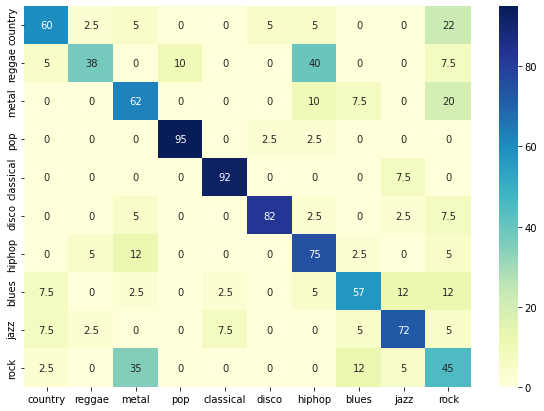

In [11]:
trainer.plot_confusion_matrix(test_dataloader)

In [12]:
trainer.classification_report(test_dataloader)

              precision    recall  f1-score   support

     country       0.73      0.60      0.66        40
      reggae       0.79      0.38      0.51        40
       metal       0.51      0.62      0.56        40
         pop       0.90      0.95      0.93        40
   classical       0.90      0.93      0.91        40
       disco       0.92      0.82      0.87        40
      hiphop       0.54      0.75      0.63        40
       blues       0.68      0.57      0.62        40
        jazz       0.72      0.72      0.73        40
        rock       0.36      0.45      0.40        40

    accuracy                           0.68       400
   macro avg       0.70      0.68      0.68       400
weighted avg       0.70      0.68      0.68       400



In [13]:
hidden_size = 128
num_layers = 5
input_size = 40
output_dim = 10
time_sequence = 702
lr = 0.001
model_2 = GRU(
    input_size=input_size, 
    time_sequence=time_sequence,
    hidden_size=hidden_size, 
    num_layers=num_layers, 
    output_dim=output_dim
    ).to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=lr)
model_2

GRU(
  (batch_norm_input): BatchNorm1d(702, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (glu): GRU(40, 128, num_layers=5, batch_first=True)
  (batch_norm_hidden): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear): Linear(in_features=128, out_features=10, bias=True)
)

In [14]:
trainer_2 = RNNFbankTrainer(
    model=model_2, 
    optimizer=optimizer, 
    loss=loss, 
    train_dataloader=train_dataloader, 
    validation_dataloader=validation_dataloader, 
    num_epochs=60)
trainer_2.train()

============================== EPOCH 1 =================================
Training accuracy 28.00
Training loss 1.9756
Validation accuracy 17.00
Validation loss 2.2566
============================== EPOCH 2 =================================
Training accuracy 37.41
Training loss 1.7397
Validation accuracy 29.00
Validation loss 2.1500
============================== EPOCH 3 =================================
Training accuracy 40.41
Training loss 1.6514
Validation accuracy 28.00
Validation loss 2.0269
============================== EPOCH 4 =================================
Training accuracy 43.53
Training loss 1.5775
Validation accuracy 40.00
Validation loss 1.8208
============================== EPOCH 5 =================================
Training accuracy 45.97
Training loss 1.5123
Validation accuracy 41.25
Validation loss 1.6910
============================== EPOCH 6 =================================
Training accuracy 48.19
Training loss 1.4368
Validation accuracy 42.75
Validation loss 1.624

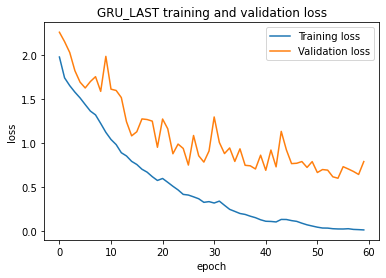

In [15]:
trainer_2.plot_loss("GRU_LAST training and validation loss")

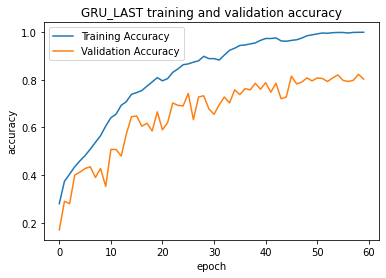

In [16]:
trainer_2.plot_accuracies("GRU_LAST training and validation accuracy")

In [17]:
trainer_2.eval(test_dataloader)

(tensor([9, 6, 5, 6, 7, 0, 0, 7, 5, 3, 6, 0, 1, 8, 6, 6, 8, 2, 1, 3, 2, 3, 4, 6,
         9, 4, 2, 7, 9, 9, 4, 1, 2, 8, 8, 6, 6, 6, 5, 0, 9, 4, 5, 0, 2, 4, 2, 6,
         0, 5, 7, 5, 6, 4, 9, 2, 4, 8, 0, 9, 0, 4, 8, 0, 7, 4, 0, 5, 5, 9, 8, 2,
         6, 9, 4, 6, 8, 0, 7, 2, 5, 2, 9, 0, 0, 6, 6, 1, 0, 8, 0, 0, 5, 4, 6, 1,
         8, 9, 4, 1, 9, 3, 4, 9, 9, 2, 1, 5, 9, 1, 9, 4, 5, 2, 6, 8, 3, 3, 7, 4,
         6, 3, 2, 6, 5, 5, 6, 2, 3, 4, 2, 4, 5, 9, 8, 6, 9, 2, 8, 2, 5, 4, 2, 2,
         2, 8, 9, 4, 9, 7, 0, 8, 6, 2, 3, 5, 5, 6, 8, 4, 3, 9, 5, 6, 5, 7, 9, 0,
         3, 3, 4, 7, 0, 0, 8, 7, 1, 3, 0, 0, 9, 3, 4, 8, 3, 2, 8, 8, 2, 5, 3, 4,
         5, 6, 9, 9, 1, 3, 5, 3, 6, 2, 3, 4, 9, 3, 9, 1, 6, 1, 2, 8, 5, 2, 9, 8,
         4, 2, 2, 2, 0, 3, 8, 1, 8, 7, 9, 3, 0, 9, 8, 6, 5, 3, 8, 9, 6, 6, 4, 3,
         9, 1, 9, 2, 4, 8, 6, 5, 6, 2, 0, 0, 0, 5, 5, 9, 0, 5, 4, 4, 5, 3, 4, 6,
         6, 5, 6, 9, 9, 4, 9, 2, 8, 7, 8, 3, 8, 6, 0, 6, 4, 1, 8, 8, 3, 3, 5, 3,
         6, 8, 2, 2, 2, 4, 8

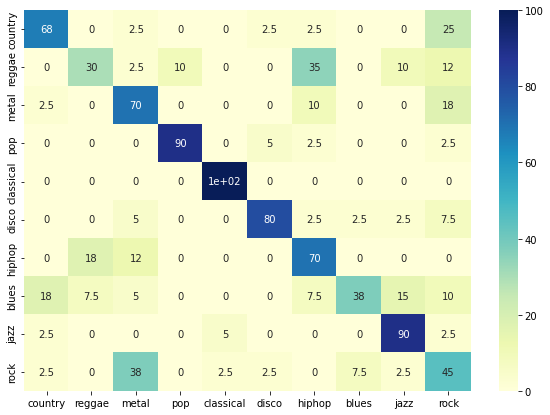

In [18]:
trainer_2.plot_confusion_matrix(test_dataloader)

In [19]:
trainer_2.classification_report(test_dataloader)

              precision    recall  f1-score   support

     country       0.73      0.68      0.70        40
      reggae       0.55      0.30      0.39        40
       metal       0.52      0.70      0.60        40
         pop       0.90      0.90      0.90        40
   classical       0.93      1.00      0.96        40
       disco       0.89      0.80      0.84        40
      hiphop       0.54      0.70      0.61        40
       blues       0.79      0.38      0.51        40
        jazz       0.75      0.90      0.82        40
        rock       0.37      0.45      0.40        40

    accuracy                           0.68       400
   macro avg       0.70      0.68      0.67       400
weighted avg       0.70      0.68      0.67       400

